In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [24]:
def saturation_function(z, theta):
    if z <= 0:
        return 0
    elif z <= theta:
        return z
    else:
        return theta

def rate_based_network_i(i_th_neuron, E_t, x_t, sum_Ej_xj, e_i, t_ref, t_rec, tau, J, N, U, dt, t):
    dE_i = (- E_t[i_th_neuron, t] + (1 - t_ref * E_t[i_th_neuron, t]) * saturation_function((J * sum_Ej_xj / N + e_i[i_th_neuron]), theta)) / tau
    dx = (1 - x_t[i_th_neuron, t]) / t_rec - U * x_t[i_th_neuron, t] * E_t[i_th_neuron, t]
    
    E_t_ = E_t[i_th_neuron, t] + dE_i * dt
    x_t_ = x_t[i_th_neuron, t] + dx * dt
    
    return E_t_, x_t_

N = 100
# Hz
E = 0
x = 1.

#second
tau = 0.001
t_ref = 0.003
t_rec = 0.8

# Hz
e_1 = -10
e_N = 10
theta = 300

J = 4.4
U =0.5

dt = 0.0001

T = 10 * (1/dt)
intT = int(T)

time = np.zeros(intT)

E_t = np.zeros((N, intT))
x_t = np.zeros((N, intT))
mean_network_activity = np.zeros(intT)

# external inputs of the units
e_i = np.zeros(N)
e_i[0] = e_1
e_i[N-1] = e_N
for i in range(N):
    e_i[i] = e_1 + (e_N - e_1)/N * i

E_t[:, 0] = E
x_t[:, 0] = x

for t in range(intT - 1):
    time[t+1] = t * dt
    sum_Ej_xj = 0.
    sum_Ei = 0
    for j in range(N):
        sum_Ej_xj += E_t[j, t] * x_t[j, t]
        sum_Ei += E_t[j, t]
    mean_network_activity[t] = sum_Ei / N
    for i in range(N):
        E_t[i, t+1], x_t[i, t+1] = rate_based_network_i(i, E_t, x_t, sum_Ej_xj, e_i, t_ref, t_rec, tau, J, N, U, dt, t)

Text(0.5,0,'Time [sec]')

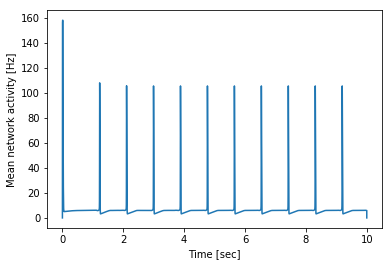

In [25]:
plt.plot(time, mean_network_activity, label = "mean")
#plt.plot(time, E_t[1, :], label = "E_1")
plt.ylabel("Mean network activity [Hz]")
plt.xlabel("Time [sec]")
#plt.legend(loc="lower right")